# Resnet feature extractor and UMAP plotting

In [1]:
# import sys
# sys.path.append('../../')
import numpy as np
import random as rand
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.applications import ResNet50
#from cellx.tools.projection import ManifoldProjection2D as MyManifoldProjection2D
import tifffile as tiff
import glob
import os
from tqdm.notebook import tnrange, tqdm, tqdm_notebook
from skimage.transform import resize
from datetime import datetime
import time
import itertools
import sys
sys.path.append('../../')
import cellx.cellx.manifold.projection as projection
from collections import Counter
from natsort import natsorted

2021-08-13 17:13:13.533510: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Define function to normalise images for resnet inference

In [2]:
def norm(x):
    return (x-np.mean(x)) / np.max([np.std(x), 1/np.prod(x.shape)])

## Define Resnet
Shape of Resnet input and load model

In [3]:
# resnet input: needs 3 channels
INPUT_SHAPE = (32, 32, 3)
# get pre-trained resnet
model = ResNet50(
    include_top=False, # exclude final fully-connected layer
    weights="imagenet",
    input_shape=INPUT_SHAPE,)
model.summary()

2021-08-13 17:13:21.814877: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-13 17:13:22.156941: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-13 17:13:22.157131: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mr-susan): /proc/driver/nvidia/version does not exist
2021-08-13 17:13:22.158534: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## Set path to images
Find images and define N, the number of individual images you wish to load

In [4]:
files = natsorted(glob.glob('/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/*tif'))#))
stack, flat_stack = [], []
N = int(len(files))
print('Number of images:', N)

Number of images: 90306


In [5]:
files

['/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos0_cell_ID_46_channel003_t100_age0.146.tif',
 '/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos0_cell_ID_46_channel003_t101_age0.147.tif',
 '/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos0_cell_ID_46_channel003_t102_age0.148.tif',
 '/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos0_cell_ID_46_channel003_t103_age0.15.tif',
 '/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos0_cell_ID_46_channel003_t104_age0.151.tif',
 '/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos0_cell_ID_46_channel003_t105_age0.153.tif',
 '/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos0_cell_ID_46_channel003_t106_age0.154.tif',
 '/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos0_cell_ID_46_channel003_t107_age0.156.tif',
 '/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos0_cell_ID_46_channel003_t108_age0.157.tif',
 '/home/nathan/data/kraken/pc

## Load images
Dependent on computer but flash storage on my laptop can load a (175,000, 32, 32) stack in approx. 3.5 minutes

In [6]:
for i, file in tqdm_notebook(enumerate(files), total = N):
    if i < N:
        tif = np.array(tiff.imread(file),dtype=np.uint8)
        tif = resize(tif, (32,32))
        stack.append(tif)
imgs = np.stack(stack, axis = 0)
imgs.shape#, flat_imgs.shape
## getting rid of stack to save memory?
stack = []

  0%|          | 0/90306 [00:00<?, ?it/s]

#### Display a small subsection of images
To check that data has loaded

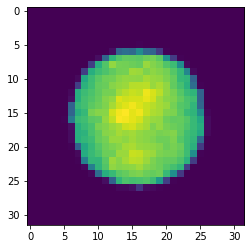

In [7]:
plt.imshow(imgs[0])

Filter certain image indices to display below

In [8]:
img_indices = [i for i, fn in enumerate(files) if 'Pos5_cell_ID_273_' in fn]

In [9]:
len(img_indices)

395

In [10]:
img_indices

[55636,
 55637,
 55638,
 55639,
 55640,
 55641,
 55642,
 55643,
 55644,
 55645,
 55646,
 55647,
 55648,
 55649,
 55650,
 55651,
 55652,
 55653,
 55654,
 55655,
 55656,
 55657,
 55658,
 55659,
 55660,
 55661,
 55662,
 55663,
 55664,
 55665,
 55666,
 55667,
 55668,
 55669,
 55670,
 55671,
 55672,
 55673,
 55674,
 55675,
 55676,
 55677,
 55678,
 55679,
 55680,
 55681,
 55682,
 55683,
 55684,
 55685,
 55686,
 55687,
 55688,
 55689,
 55690,
 55691,
 55692,
 55693,
 55694,
 55695,
 55696,
 55697,
 55698,
 55699,
 55700,
 55701,
 55702,
 55703,
 55704,
 55705,
 55706,
 55707,
 55708,
 55709,
 55710,
 55711,
 55712,
 55713,
 55714,
 55715,
 55716,
 55717,
 55718,
 55719,
 55720,
 55721,
 55722,
 55723,
 55724,
 55725,
 55726,
 55727,
 55728,
 55729,
 55730,
 55731,
 55732,
 55733,
 55734,
 55735,
 55736,
 55737,
 55738,
 55739,
 55740,
 55741,
 55742,
 55743,
 55744,
 55745,
 55746,
 55747,
 55748,
 55749,
 55750,
 55751,
 55752,
 55753,
 55754,
 55755,
 55756,
 55757,
 55758,
 55759,
 55760,


In [11]:
### print filename that corresponds to img indices
for i in img_indices:
    print(files[i])

/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell_ID_273_channel003_t61_age0.0.tif
/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell_ID_273_channel003_t62_age0.003.tif
/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell_ID_273_channel003_t63_age0.005.tif
/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell_ID_273_channel003_t64_age0.008.tif
/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell_ID_273_channel003_t65_age0.01.tif
/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell_ID_273_channel003_t66_age0.013.tif
/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell_ID_273_channel003_t67_age0.015.tif
/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell_ID_273_channel003_t68_age0.018.tif
/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell_ID_273_channel003_t69_age0.02.tif
/home/nathan/data/kraken/pcna/glimpses/MK0000/circle_20pxR/Pos5_cell

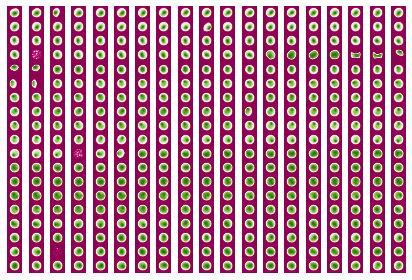

In [12]:
fig, ax_array = plt.subplots(19,19)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    #ax.imshow(imgs[i], cmap='PiYG')
    ax.imshow(imgs[i+img_indices[0]], cmap='PiYG')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('/home/nathan/Pictures/ordered_image_patch_collage_PCNA_PiYG.jpg', dpi = 300)

### Check distribution of image patches with respect to experimental position and cellular ID

Counting instances of position and cell ID

In [13]:
fn = files[0]
fn.split('_channel')[0].split('/')[-1]

'Pos0_cell_ID_46'

In [14]:
366+266+223

855

In [15]:
len_tracks = Counter([fn.split('_channel')[0].split('/')[-1] for fn in files])
len_tracks

Counter({'Pos0_cell_ID_46': 40,
         'Pos0_cell_ID_173': 262,
         'Pos0_cell_ID_190': 454,
         'Pos0_cell_ID_214': 714,
         'Pos0_cell_ID_244': 498,
         'Pos0_cell_ID_1445': 460,
         'Pos0_cell_ID_1580': 284,
         'Pos0_cell_ID_1686': 400,
         'Pos0_cell_ID_1783': 288,
         'Pos0_cell_ID_1796': 391,
         'Pos0_cell_ID_1826': 391,
         'Pos0_cell_ID_1867': 283,
         'Pos0_cell_ID_1936': 216,
         'Pos0_cell_ID_1984': 391,
         'Pos0_cell_ID_2045': 401,
         'Pos0_cell_ID_2072': 383,
         'Pos0_cell_ID_2087': 411,
         'Pos0_cell_ID_2151': 347,
         'Pos0_cell_ID_2212': 63,
         'Pos0_cell_ID_2226': 373,
         'Pos0_cell_ID_2232': 373,
         'Pos0_cell_ID_2266': 12,
         'Pos0_cell_ID_2268': 229,
         'Pos0_cell_ID_2288': 30,
         'Pos0_cell_ID_2321': 358,
         'Pos0_cell_ID_2393': 227,
         'Pos0_cell_ID_2441': 155,
         'Pos0_cell_ID_2499': 212,
         'Pos0_cell_ID_2576': 

Getting the longest track

In [16]:
print(max(len_tracks, key=len_tracks.get),'length:', len_tracks[max(len_tracks, key=len_tracks.get)])
max_track = max(len_tracks, key=len_tracks.get)

Pos5_cell_ID_34 length: 770


Counting instances of positions only

In [17]:
Counter([fn.split('_cell')[0].split('/')[-1] for fn in files])

Counter({'Pos0': 54211, 'Pos5': 12705, 'Pos6': 15624, 'Pos7': 7766})

(Only these positions because they were the competitive ones? Need to check)

## Transform images
From single-channel to 3-channel for Resnet and UMAP

In [24]:
imgs = np.repeat(imgs[..., np.newaxis], 3, axis=-1)
imgs.shape

(90306, 32, 32, 3)

## Generate labels
Obtain precise and coarse data labels from the filename of each image which is labelled with fractional age of cell 

In [17]:
labels, coarse_labels, single_cell_labels, time_dep_single_cell_labels = [], [], [], []
for j, i in enumerate(files):
  if j < N:
    label = float((i.split('age')[1]).split('.tif')[0]) 
    labels.append(label)
    if label < 0.34:
      coarse_label = 0
    elif label <0.67:
      coarse_label = 0.5
    else:
      coarse_label = 1
    coarse_labels.append(coarse_label)
    
    ### single cell label
    cell_ID = max_track
    if cell_ID in i:
        label = 2
        coarse_label = 2
        single_cell_label = 1
        #time_dep_label = label
        time_dep_single_cell_labels.append(float((i.split('age')[1]).split('.tif')[0]) )
        single_cell_labels.append(single_cell_label)
    else:
        single_cell_label = 0
        single_cell_labels.append(single_cell_label)
        time_dep_single_cell_labels.append(single_cell_label)

#print(labels)

## Normalisation

Normalise images and covert to float32 for Resnet

In [18]:
imgs[0].dtype

dtype('float64')

new method, need to ensure is float32

In [19]:
imgs = norm(imgs.astype(np.float32))
imgs.shape, imgs.dtype

((90306, 32, 32, 3), dtype('float32'))

## Extract features with trained resnet

In [20]:
test_features = model.predict(imgs, batch_size=64)
test_features.shape

2021-08-12 18:28:58.027708: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-12 18:28:58.070288: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3499910000 Hz


(90306, 1, 1, 2048)

## Preprocessing for dimensionality reduction

In [21]:
# reshape model predictions to 2D array
X = test_features.reshape(test_features.shape[0], -1)
print(X.shape)
# standard scaling -- Standardize features by removing the mean and scaling to unit variance
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

(90306, 2048)


# Define hyperparameters for UMAP
`nbs` = nearest neighbours

`eps` = epochs

In [22]:
nbs = 50
eps = 2000
rnd = 0

## Run UMAP 

In [23]:
### UMAP() calls the UMAP object and defines the various hyperparams
mapper = UMAP(n_neighbors=nbs, n_epochs=eps, random_state=rnd, verbose=True)
### fit() method finds a low dimensional representation of hte data
mapper.fit(X)

UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=2000, n_neighbors=50,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 18:30:01 2021 Finding Nearest Neighbors
Thu Aug 12 18:30:01 2021 Building RP forest with 20 trees
Thu Aug 12 18:30:08 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug 12 18:30:37 2021 Finished Nearest Neighbor Search
Thu Aug 12 18:30:41 2021 Construct embedding
	completed  0  /  2000 epochs
	completed  200  /  2000 epochs
	completed  400  /  2000 epochs
	completed  600  /  2000 epochs
	completed  800  /  2000 epochs
	completed  1000  /  2000 epochs
	completed  1200  /  2000 epochs
	completed  1400  /  2000 epochs
	completed  1600  /  2000 epochs
	completed  1800  /  2000 epochs
Thu Aug 12 18:44:37 2021 Finished embedding


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=2000, n_neighbors=50,
     random_state=0, verbose=True)

## Plot mapper embedding

In [1]:
fig, ax = plt.subplots(figsize=(9.5, 9.5))
scatter = ax.scatter(mapper.embedding_[:, 1], 
                     mapper.embedding_[:, 0], 
                     c=labels,#coarse_labels, 
                     cmap="Paired", 
                     alpha=0.5, 
                     edgecolors="none", s=20, zorder=1)

ax.set_title("UMAP embedding for N={} images and with hyperparameters nbs={}, eps={}".format(N,nbs,eps), fontsize=18)
ax.legend(*scatter.legend_elements(), title="Labels", title_fontsize=14, fontsize=14)
ax.set_facecolor('k')
ax.set_axisbelow(True)
ax.grid(color="0.25", linestyle="--")

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

# fig.savefig(f"/content/drive/MyDrive/PhD/export_data/umap_{mapper.n_neighbors}nbs_rnd{mapper.random_state}.png", 
#             dpi=300, bbox_inches="tight")

NameError: name 'plt' is not defined

## Plot manifold projection of images onto UMAP

In [25]:
bins = 50
embed_imgs = ((imgs-np.min(imgs))/(np.ptp(imgs)) * 255).astype(np.uint32)##np.uint8)
#mapper_projection = MyManifoldProjection2D(embed_imgs, output_shape=(32,32))
mapper_projection = projection.ManifoldProjection2D(embed_imgs, output_shape=(32,32))
img_grid, heatmap, delimiters = mapper_projection(mapper.embedding_, components=(0,1), bins=bins, method='random')## method='sum'

100%|████████████████████████████████████████| 547/547 [00:02<00:00, 183.93it/s]


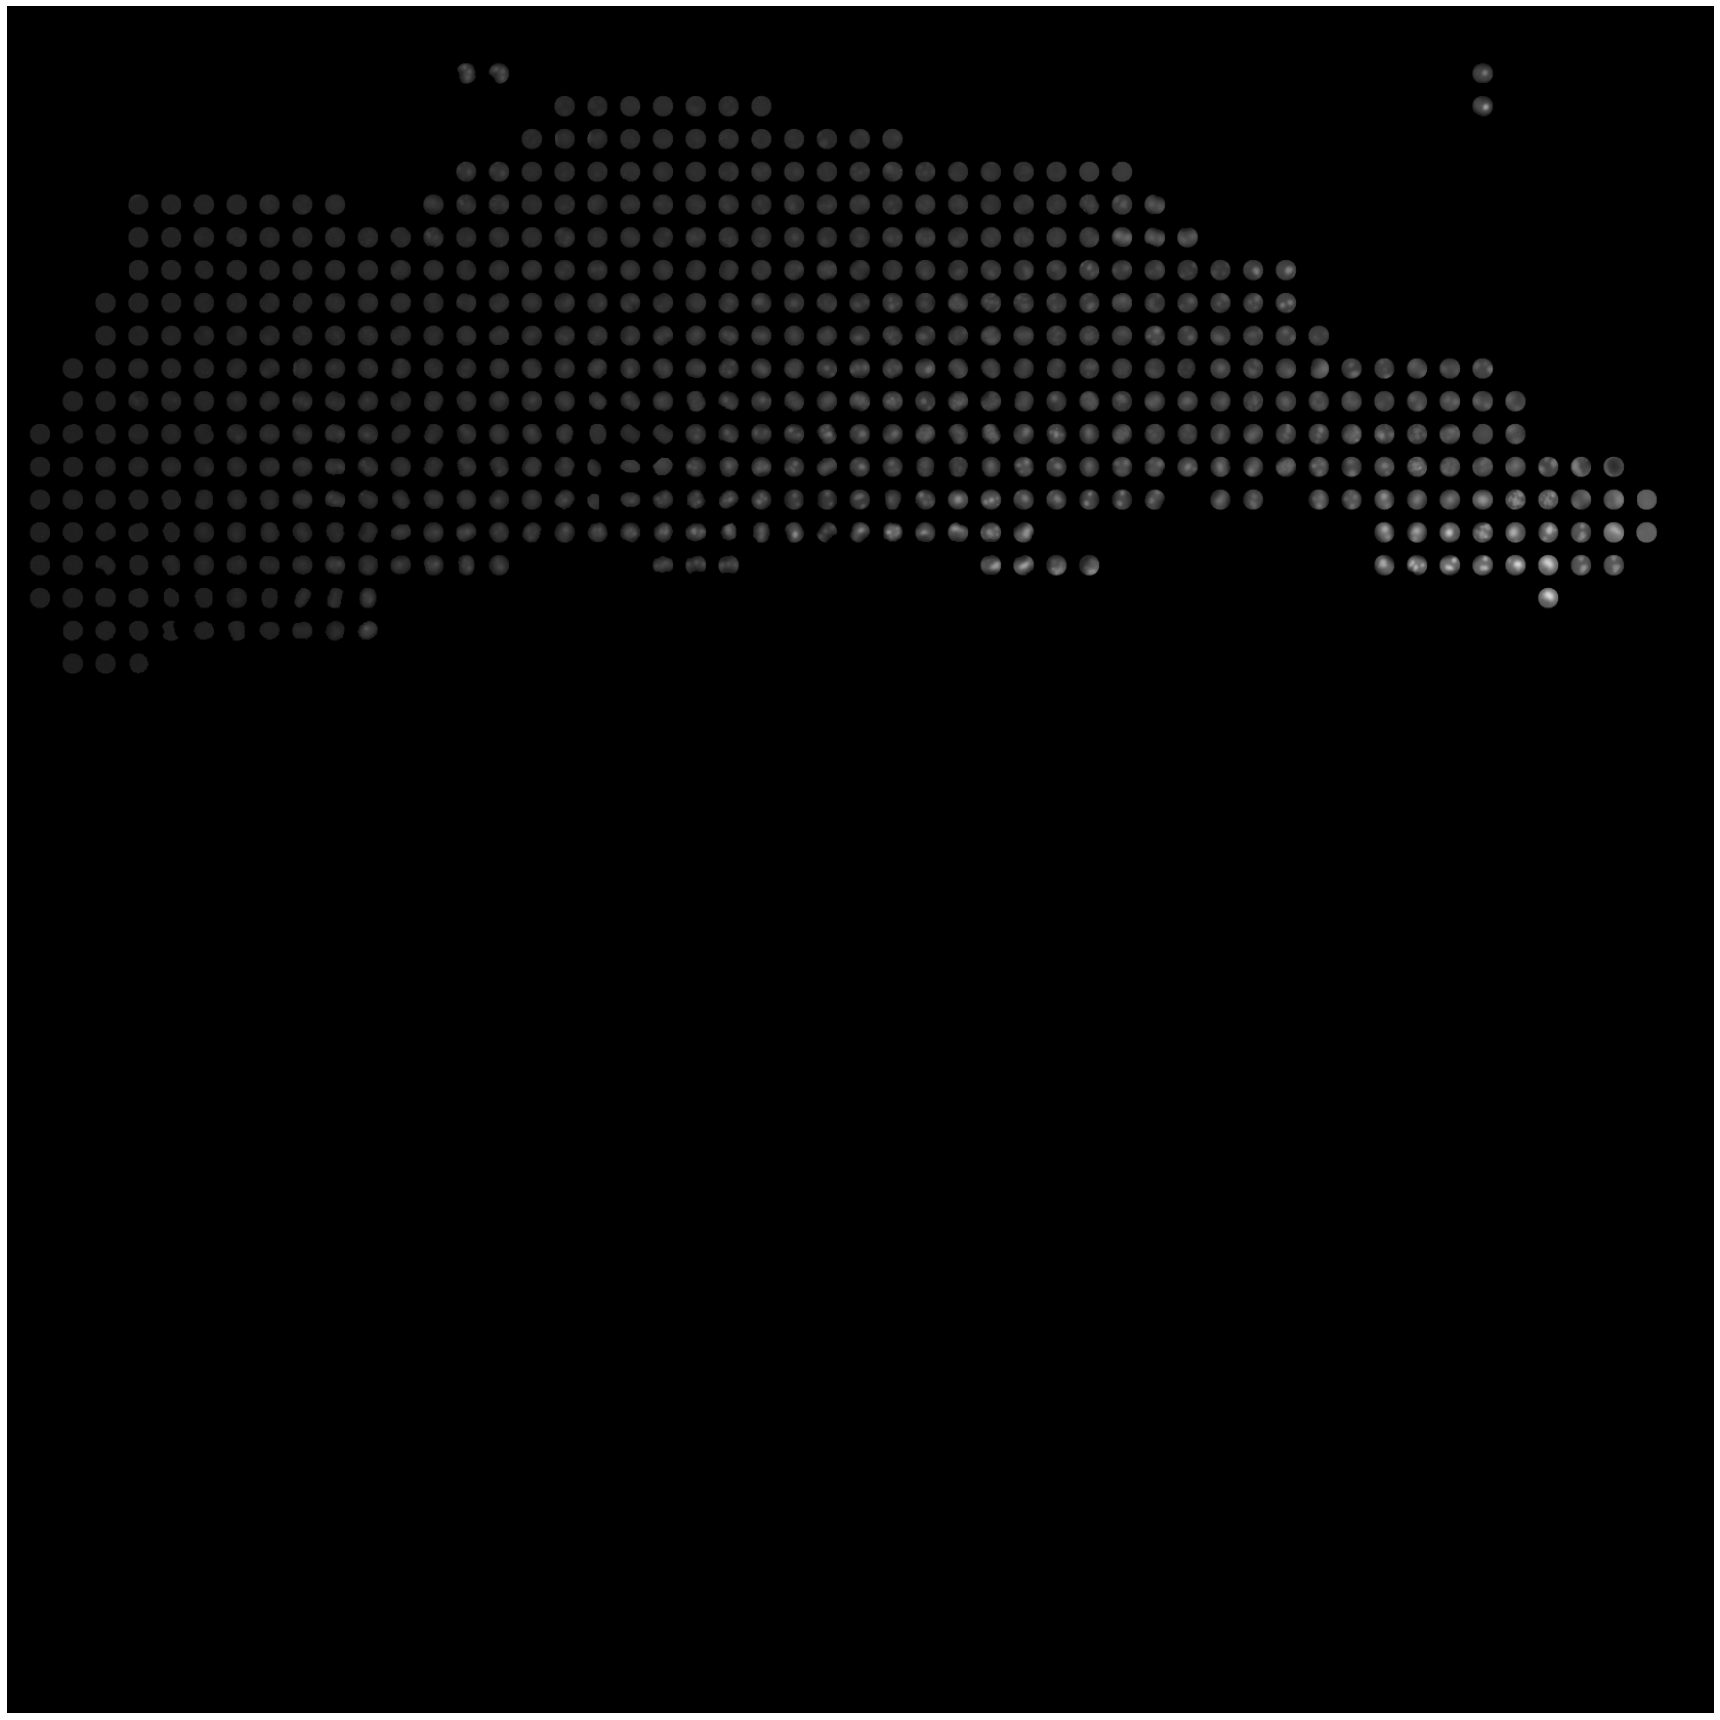

In [26]:
fig, ax = plt.subplots(figsize=(24,24))
im = plt.imshow(img_grid,
                origin="lower",
                #extent=delimiters, 
                #vmin=0, vmax=255, # modify or comment out according to image intensity values to show
                cmap="gray",)
plt.axis('off')
plt.tight_layout()
#plt.colorbar()
fn = '/home/nathan/data/analysis_results/UMAP/confocal/trial_output/manifold_projection_nbs{}_eps{}_{}.png'.format(nbs, eps, time.strftime("%Y%m%d-%H%M%S"))
#plt.savefig(fn, dpi=300, bbox_inches="tight")

# Single cell projections of mapper embedding

Take the time dependent labels from a single cell (previously defined) and filter away all instances that is not that single cell (i.e. label = 0)

In [27]:
single_cell_labels_filtered = [label for i, label in enumerate(time_dep_single_cell_labels) if label > 0]

Get the indices of those labels and filter the embedding to only show those labels

In [28]:
indices = [i for i, label in enumerate(time_dep_single_cell_labels) if label > 0]
new_embedding_1 = [k for j, k in enumerate(mapper.embedding_[:, 1]) if j in indices]
new_embedding_0 = [k for j, k in enumerate(mapper.embedding_[:, 0]) if j in indices]

# Plot a single cell trajectory

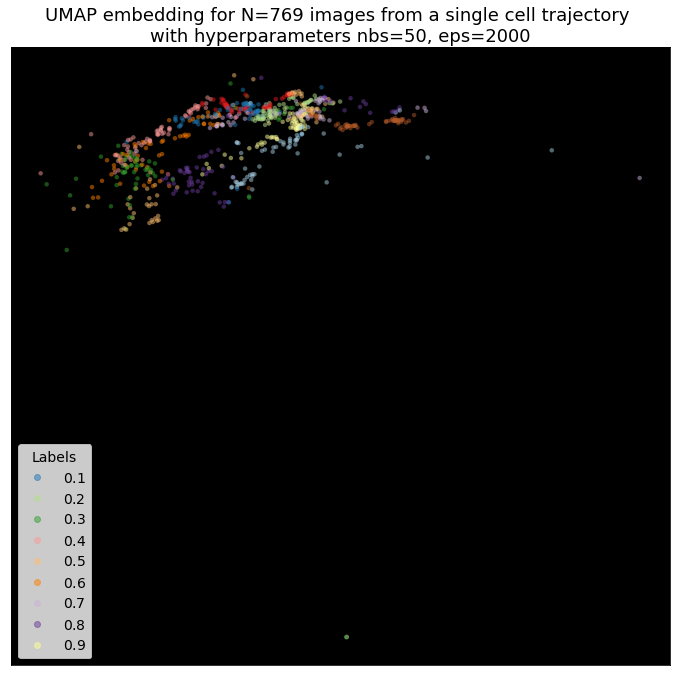

<Figure size 432x288 with 0 Axes>

In [29]:
fig, ax = plt.subplots(figsize=(9.5, 9.5))
scatter = ax.scatter(new_embedding_1, 
                     new_embedding_0, 
                     c=single_cell_labels_filtered,#coarse_labels, 
                     cmap="Paired", 
                     alpha=0.5, 
                     edgecolors="none", s=20, zorder=1)

ax.set_title("UMAP embedding for N={} images from a single cell trajectory \nwith hyperparameters nbs={}, eps={}".format(len(single_cell_labels_filtered),nbs,eps), fontsize=18)
ax.legend(*scatter.legend_elements(), title="Labels", title_fontsize=14, fontsize=14)
ax.set_facecolor('k')
ax.set_axisbelow(True)
ax.grid(color="0.25", linestyle="--")

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

fn = '/home/nathan/data/analysis_results/UMAP/kraken/circle_crop/single_cell_plots/manifold_projection_nbs{}_eps{}_{}.png'.format(nbs, eps, time.strftime("%Y%m%d-%H%M%S"))
plt.savefig(fn, dpi=300, bbox_inches="tight")

## Plot manifold projection of single cell images onto UMAP

Filter image patches

In [30]:
imgs

array([[[[-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902],
         ...,
         [-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902]],

        [[-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902],
         ...,
         [-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902]],

        [[-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902],
         ...,
         [-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902]],

        ...,

        [[-0.6114902, -0.6114902, -0.6114902],
         [-0.6114902, -0.6114902, -0.6114902]

In [31]:
imgs.shape

(90306, 32, 32, 3)

In [32]:
type(imgs)

numpy.ndarray

In [33]:
filtered_imgs = [img for i, img in enumerate(imgs) if i in indices]
filtered_imgs = np.stack(filtered_imgs, axis =0)
filtered_imgs.shape

(769, 32, 32, 3)

In [34]:
type(filtered_imgs)

numpy.ndarray

aligning embedding with new smaller subset of images

In [35]:
mapper.embedding_.shape

(90306, 2)

In [36]:
new_embedding_ = [k for j, k in enumerate(mapper.embedding_) if j in indices]

In [37]:
len(mapper.embedding_)

90306

In [38]:
len(new_embedding_)

769

In [39]:
new_embedding_

[array([14.417927 , -2.9641697], dtype=float32),
 array([16.087315 ,  1.3410075], dtype=float32),
 array([14.637222,  2.2698  ], dtype=float32),
 array([14.916646 ,  3.4769285], dtype=float32),
 array([15.0965805 , -0.13217148], dtype=float32),
 array([ 9.734045 , -3.7468815], dtype=float32),
 array([14.618833 ,  2.1916425], dtype=float32),
 array([15.115757, -1.449109], dtype=float32),
 array([12.227675 , -1.6466094], dtype=float32),
 array([12.067023  , -0.42625082], dtype=float32),
 array([11.871193, -2.143303], dtype=float32),
 array([13.930468  ,  0.25265965], dtype=float32),
 array([14.692102  , -0.07873774], dtype=float32),
 array([15.615284  ,  0.02429992], dtype=float32),
 array([12.821643, -3.983624], dtype=float32),
 array([14.750883 , -1.5985348], dtype=float32),
 array([16.31355   ,  0.61684763], dtype=float32),
 array([11.307716 , -3.6536758], dtype=float32),
 array([16.90384  , -1.0378214], dtype=float32),
 array([11.384562  , -0.86175114], dtype=float32),
 array([17.208

In [40]:
new_embedding_ = np.stack(new_embedding_, 0)

In [41]:
mapper.embedding_.shape

(90306, 2)

In [42]:
new_embedding_.shape

(769, 2)

In [43]:
bins = 25
embed_imgs = ((filtered_imgs-np.min(filtered_imgs))/(np.ptp(filtered_imgs)) * 255).astype(np.uint32)##np.uint8)
#mapper_projection = MyManifoldProjection2D(embed_imgs, output_shape=(32,32))
mapper_projection = projection.ManifoldProjection2D(embed_imgs, output_shape=(32,32))
img_grid, heatmap, delimiters = mapper_projection(new_embedding_, components=(0,1), bins=bins, method='random')## method='sum'

100%|██████████████████████████████████████████| 70/70 [00:00<00:00, 650.32it/s]


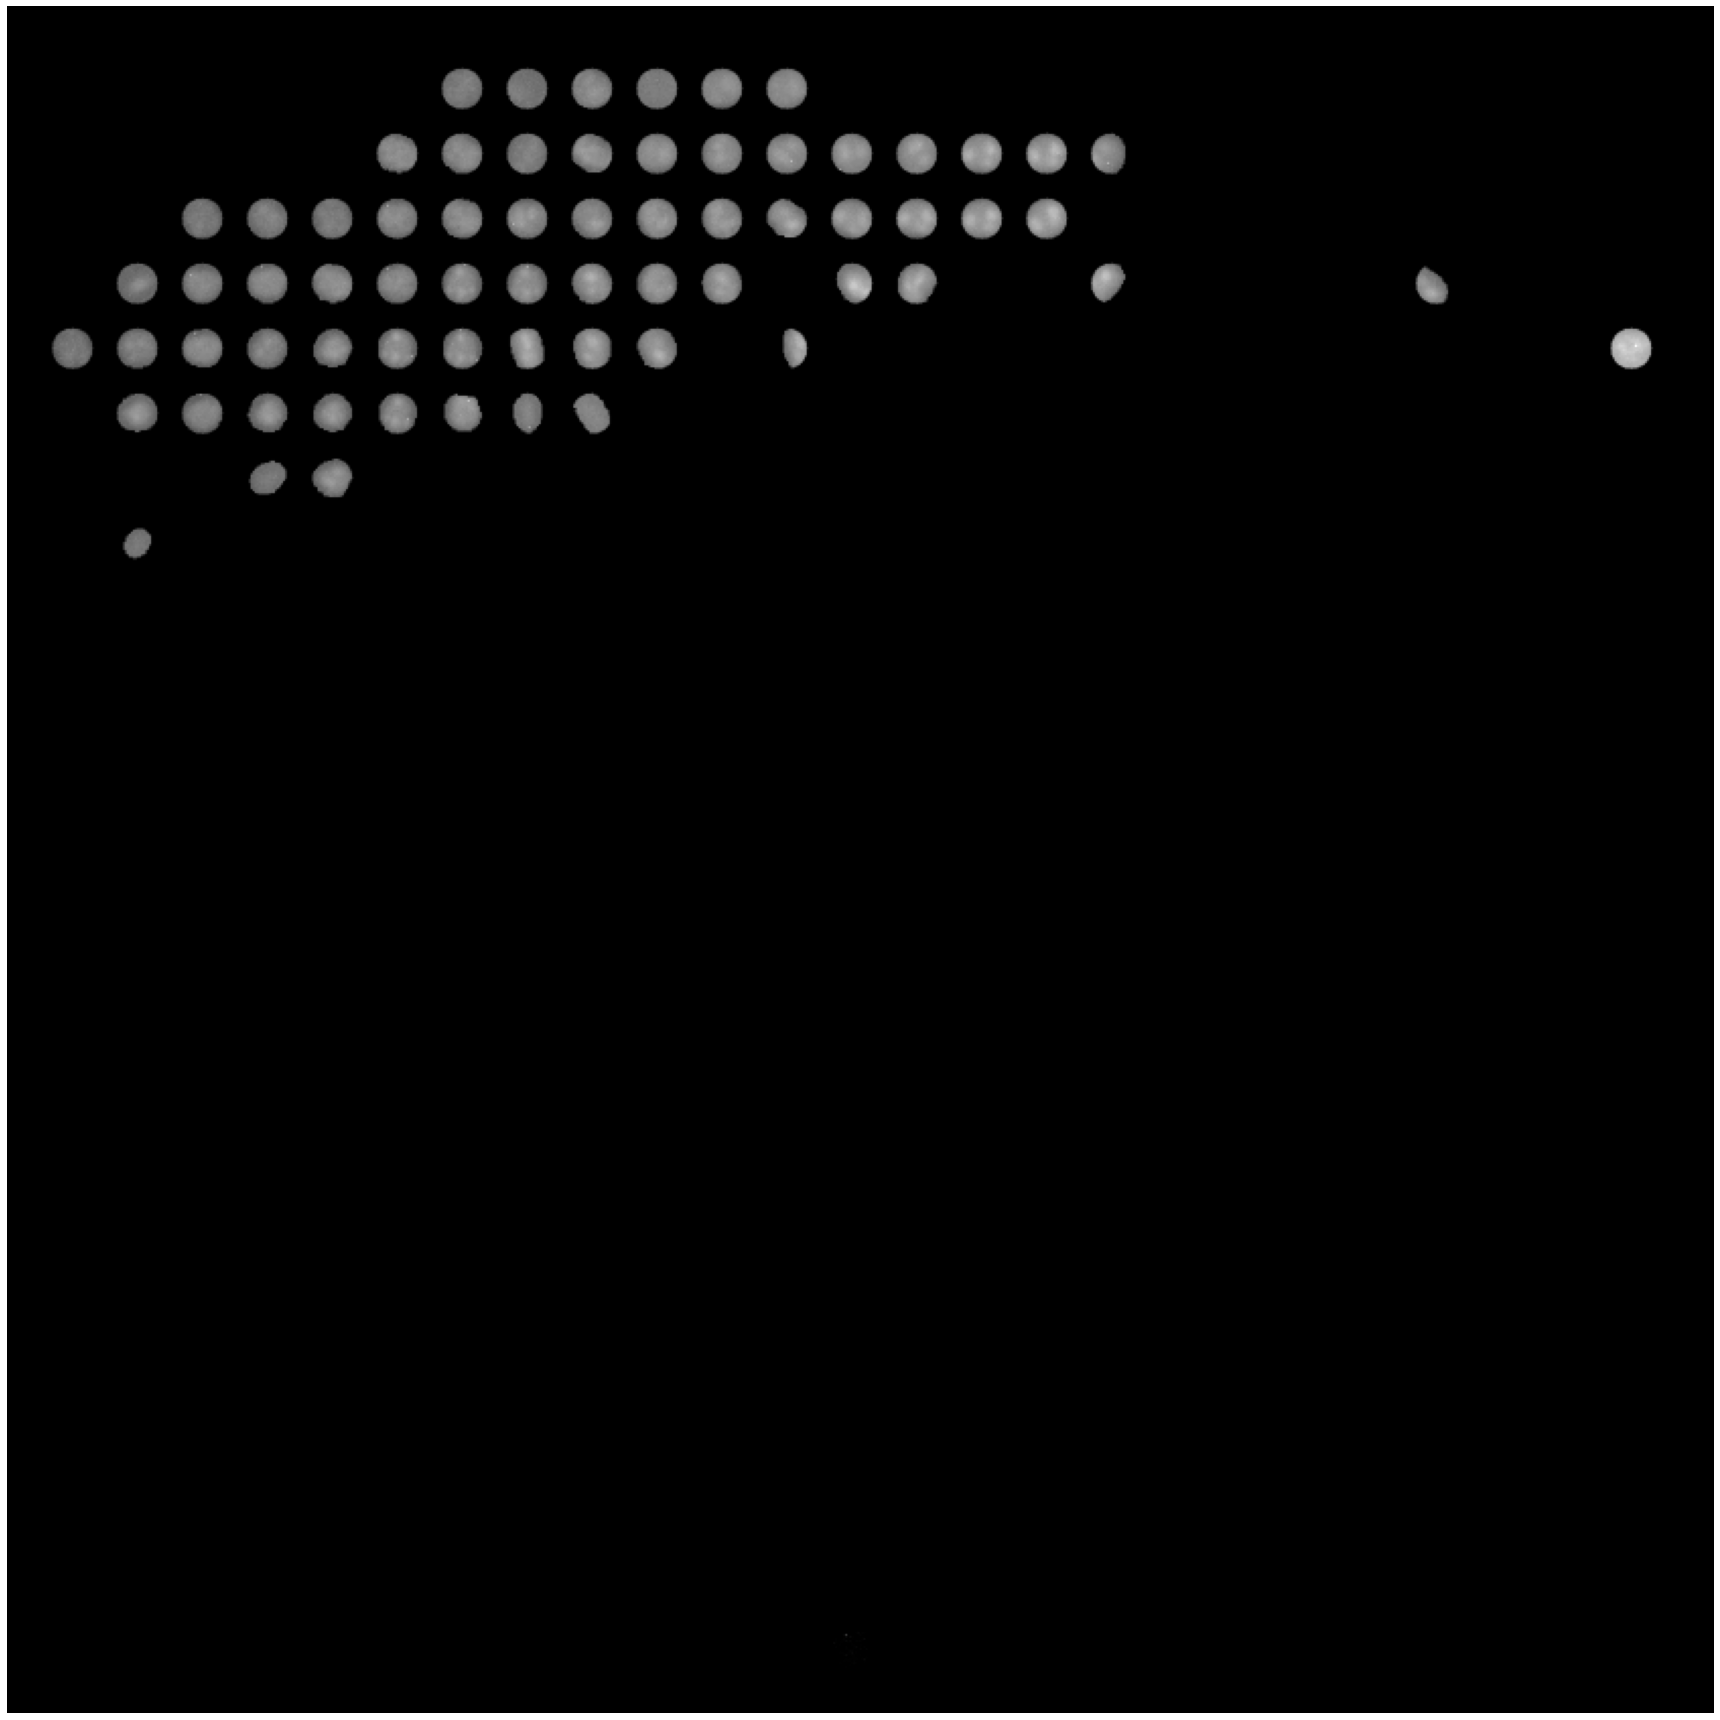

In [44]:
fig, ax = plt.subplots(figsize=(24,24))
im = plt.imshow(img_grid,
                origin="lower",
                #extent=delimiters, 
                #vmin=0, vmax=255, # modify or comment out according to image intensity values to show
                cmap="gray",)
plt.axis('off')
plt.tight_layout()
#plt.colorbar()
fn = '/home/nathan/data/analysis_results/UMAP/kraken/circle_crop/single_cell_plots/manifold_projection_nbs{}_eps{}_{}.png'.format(nbs, eps, time.strftime("%Y%m%d-%H%M%S"))
plt.savefig(fn, dpi=300, bbox_inches="tight")

In [45]:
img_grid.shape

(841, 841, 3)

# Iterating over all of the above with different hyperparameters
The following functions take the previously loaded imagery and put it through the UMAP pipeline to test on different settings

In [46]:
def create_UMAP_projection(nbs, eps, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print('output directory created at ', output_dir)
    
    rnd = 0
    mapper = UMAP(n_neighbors=nbs, n_epochs=eps, random_state=rnd, verbose=True)
    mapper.fit(X)
    # plot mapper embedding
    fig, ax = plt.subplots(figsize=(9.5, 9.5))

    scatter = ax.scatter(mapper.embedding_[:, 1], mapper.embedding_[:, 0], c=coarse_labels, 
                        #  label=["non-db", "db"], 
                         cmap="Paired", 
                         alpha=0.8, 
                         edgecolors="none", s=5, zorder=1)

    ax.legend(*scatter.legend_elements(), title="Labels", title_fontsize=14, fontsize=14)
    ax.set_facecolor('k')
    ax.set_axisbelow(True)
    ax.grid(color="0.25", linestyle="--")

    plt.tight_layout()
    #plt.show()
    if output_dir != '':
        fn = os.path.join(output_dir, 'UMAP_nbs{}_eps{}_{}.png'.format(nbs, eps, time.strftime("%Y%m%d-%H%M%S")))
        fig.savefig(fn, dpi=300, bbox_inches="tight")
    plt.clf()
    
    embed_imgs = ((imgs-np.min(imgs))/(np.ptp(imgs)) * 255).astype(np.uint32)##np.uint8)
    #mapper_projection = MyManifoldProjection2D(embed_imgs, output_shape=(32,32))
    mapper_projection = projection.ManifoldProjection2D(embed_imgs, output_shape=(32,32))
    img_grid, heatmap, delimiters = mapper_projection(mapper.embedding_, components=(0,1), bins=bins, method='random')## method='sum'
    fig, ax = plt.subplots(figsize=(24,24))
    im = plt.imshow(img_grid,
                    origin="lower",
                    #extent=delimiters, 
                    #vmin=0, vmax=255, # modify or comment out according to image intensity values to show
                    cmap="gray",)
    plt.axis('off')
    plt.tight_layout()
    #plt.colorbar()
    
    if output_dir != '':
        fn = os.path.join(output_dir, 'manifold_projection_nbs{}_eps{}_{}.png'.format(nbs, eps, time.strftime("%Y%m%d-%H%M%S")))
        plt.savefig(fn, dpi=300, bbox_inches="tight")
    plt.clf()

## Set hyperparameters and iterate through, creating and saving out different UMAP representations

In [ ]:
nbss = [#5, 20, 50, 
        100, 300, 600, 1000, 3, 4, 6, 7, 2]
epss = [2000, 4000, 8000]
output_dir = '/home/nathan/data/analysis_results/UMAP/kraken/circle_crop/trial_output/'
for nbs, eps in tqdm(itertools.product(nbss, epss)):
    create_UMAP_projection(nbs, eps, output_dir)

0it [00:00, ?it/s]

UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=2000, n_neighbors=5,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 18:45:13 2021 Finding Nearest Neighbors
Thu Aug 12 18:45:13 2021 Building RP forest with 20 trees
Thu Aug 12 18:45:20 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Aug 12 18:45:22 2021 Finished Nearest Neighbor Search
Thu Aug 12 18:45:23 2021 Construct embedding
	completed  0  /  2000 epochs
	completed  200  /  2000 epochs
	completed  400  /  2000 epochs
	completed  600  /  2000 epochs
	completed  800  /  2000 epochs
	completed  1000  /  2000 epochs
	completed  1200  /  2000 epochs
	completed  1400  /  2000 epochs
	completed  1600  /  2000 epochs
	completed  1800  /  2000 epochs
Thu Aug 12 18:49:32 2021 Finished embedding



100%|████████████████████████████████████████| 272/272 [00:02<00:00, 110.49it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=4000, n_neighbors=5,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 18:50:04 2021 Finding Nearest Neighbors
Thu Aug 12 18:50:04 2021 Building RP forest with 20 trees
Thu Aug 12 18:50:11 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Aug 12 18:50:12 2021 Finished Nearest Neighbor Search
Thu Aug 12 18:50:13 2021 Construct embedding
	completed  0  /  4000 epochs
	completed  400  /  4000 epochs
	completed  800  /  4000 epochs
	completed  1200  /  4000 epochs
	completed  1600  /  4000 epochs
	completed  2000  /  4000 epochs
	completed  2400  /  4000 epochs
	completed  2800  /  4000 epochs
	completed  3200  /  4000 epochs
	completed  3600  /  4000 epochs
Thu Aug 12 18:58:16 2021 Finished embedding



100%|█████████████████████████████████████████| 206/206 [00:02<00:00, 87.29it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=8000, n_neighbors=5,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 18:58:49 2021 Finding Nearest Neighbors
Thu Aug 12 18:58:49 2021 Building RP forest with 20 trees
Thu Aug 12 18:58:59 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Aug 12 18:59:01 2021 Finished Nearest Neighbor Search
Thu Aug 12 18:59:02 2021 Construct embedding
	completed  0  /  8000 epochs
	completed  800  /  8000 epochs
	completed  1600  /  8000 epochs
	completed  2400  /  8000 epochs
	completed  3200  /  8000 epochs
	completed  4000  /  8000 epochs
	completed  4800  /  8000 epochs
	completed  5600  /  8000 epochs
	completed  6400  /  8000 epochs
	completed  7200  /  8000 epochs
Thu Aug 12 19:14:48 2021 Finished embedding



100%|█████████████████████████████████████████| 157/157 [00:02<00:00, 68.59it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=2000, n_neighbors=20,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 19:15:18 2021 Finding Nearest Neighbors
Thu Aug 12 19:15:18 2021 Building RP forest with 20 trees
Thu Aug 12 19:15:24 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Aug 12 19:15:30 2021 Finished Nearest Neighbor Search
Thu Aug 12 19:15:30 2021 Construct embedding
	completed  0  /  2000 epochs
	completed  200  /  2000 epochs
	completed  400  /  2000 epochs
	completed  600  /  2000 epochs
	completed  800  /  2000 epochs
	completed  1000  /  2000 epochs
	completed  1200  /  2000 epochs
	completed  1400  /  2000 epochs
	completed  1600  /  2000 epochs
	completed  1800  /  2000 epochs
Thu Aug 12 19:24:10 2021 Finished embedding



100%|█████████████████████████████████████████| 205/205 [00:02<00:00, 89.74it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=4000, n_neighbors=20,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 19:24:42 2021 Finding Nearest Neighbors
Thu Aug 12 19:24:42 2021 Building RP forest with 20 trees
Thu Aug 12 19:24:48 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Aug 12 19:24:54 2021 Finished Nearest Neighbor Search
Thu Aug 12 19:24:54 2021 Construct embedding
	completed  0  /  4000 epochs
	completed  400  /  4000 epochs
	completed  800  /  4000 epochs
	completed  1200  /  4000 epochs
	completed  1600  /  4000 epochs
	completed  2000  /  4000 epochs
	completed  2400  /  4000 epochs
	completed  2800  /  4000 epochs
	completed  3200  /  4000 epochs
	completed  3600  /  4000 epochs
Thu Aug 12 19:42:11 2021 Finished embedding



100%|█████████████████████████████████████████| 169/169 [00:02<00:00, 60.36it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=8000, n_neighbors=20,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 19:42:42 2021 Finding Nearest Neighbors
Thu Aug 12 19:42:42 2021 Building RP forest with 20 trees
Thu Aug 12 19:42:49 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Aug 12 19:42:54 2021 Finished Nearest Neighbor Search
Thu Aug 12 19:42:55 2021 Construct embedding
	completed  0  /  8000 epochs
	completed  800  /  8000 epochs
	completed  1600  /  8000 epochs
	completed  2400  /  8000 epochs
	completed  3200  /  8000 epochs
	completed  4000  /  8000 epochs
	completed  4800  /  8000 epochs
	completed  5600  /  8000 epochs
	completed  6400  /  8000 epochs
	completed  7200  /  8000 epochs
Thu Aug 12 20:18:42 2021 Finished embedding



100%|█████████████████████████████████████████| 144/144 [00:02<00:00, 62.88it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=2000, n_neighbors=50,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 20:19:14 2021 Finding Nearest Neighbors
Thu Aug 12 20:19:14 2021 Building RP forest with 20 trees
Thu Aug 12 20:19:20 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug 12 20:19:40 2021 Finished Nearest Neighbor Search
Thu Aug 12 20:19:41 2021 Construct embedding
	completed  0  /  2000 epochs
	completed  200  /  2000 epochs
	completed  400  /  2000 epochs
	completed  600  /  2000 epochs
	completed  800  /  2000 epochs
	completed  1000  /  2000 epochs
	completed  1200  /  2000 epochs
	completed  1400  /  2000 epochs
	completed  1600  /  2000 epochs
	completed  1800  /  2000 epochs
Thu Aug 12 20:33:28 2021 Finished embedding



100%|█████████████████████████████████████████| 157/157 [00:02<00:00, 70.56it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=4000, n_neighbors=50,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 20:33:58 2021 Finding Nearest Neighbors
Thu Aug 12 20:33:58 2021 Building RP forest with 20 trees
Thu Aug 12 20:34:04 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug 12 20:34:24 2021 Finished Nearest Neighbor Search
Thu Aug 12 20:34:25 2021 Construct embedding
	completed  0  /  4000 epochs
	completed  400  /  4000 epochs
	completed  800  /  4000 epochs
	completed  1200  /  4000 epochs
	completed  1600  /  4000 epochs
	completed  2000  /  4000 epochs
	completed  2400  /  4000 epochs
	completed  2800  /  4000 epochs
	completed  3200  /  4000 epochs
	completed  3600  /  4000 epochs
Thu Aug 12 21:01:24 2021 Finished embedding



100%|█████████████████████████████████████████| 140/140 [00:02<00:00, 51.19it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=8000, n_neighbors=50,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 21:01:55 2021 Finding Nearest Neighbors
Thu Aug 12 21:01:55 2021 Building RP forest with 20 trees
Thu Aug 12 21:02:01 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug 12 21:02:21 2021 Finished Nearest Neighbor Search
Thu Aug 12 21:02:22 2021 Construct embedding
	completed  0  /  8000 epochs
	completed  800  /  8000 epochs
	completed  1600  /  8000 epochs
	completed  2400  /  8000 epochs
	completed  3200  /  8000 epochs
	completed  4000  /  8000 epochs
	completed  4800  /  8000 epochs
	completed  5600  /  8000 epochs
	completed  6400  /  8000 epochs
	completed  7200  /  8000 epochs
Thu Aug 12 21:55:22 2021 Finished embedding



100%|█████████████████████████████████████████| 108/108 [00:02<00:00, 48.85it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=2000, n_neighbors=100,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 21:55:52 2021 Finding Nearest Neighbors
Thu Aug 12 21:55:52 2021 Building RP forest with 20 trees
Thu Aug 12 21:55:58 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Aug 12 21:57:20 2021 Finished Nearest Neighbor Search
Thu Aug 12 21:57:22 2021 Construct embedding
	completed  0  /  2000 epochs
	completed  200  /  2000 epochs
	completed  400  /  2000 epochs
	completed  600  /  2000 epochs
	completed  800  /  2000 epochs
	completed  1000  /  2000 epochs
	completed  1200  /  2000 epochs
	completed  1400  /  2000 epochs
	completed  1600  /  2000 epochs
	completed  1800  /  2000 epochs
Thu Aug 12 22:16:00 2021 Finished embedding



100%|█████████████████████████████████████████| 141/141 [00:02<00:00, 51.87it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=4000, n_neighbors=100,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 22:16:30 2021 Finding Nearest Neighbors
Thu Aug 12 22:16:30 2021 Building RP forest with 20 trees
Thu Aug 12 22:16:37 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Aug 12 22:17:58 2021 Finished Nearest Neighbor Search
Thu Aug 12 22:18:00 2021 Construct embedding
	completed  0  /  4000 epochs
	completed  400  /  4000 epochs
	completed  800  /  4000 epochs
	completed  1200  /  4000 epochs
	completed  1600  /  4000 epochs
	completed  2000  /  4000 epochs
	completed  2400  /  4000 epochs
	completed  2800  /  4000 epochs
	completed  3200  /  4000 epochs
	completed  3600  /  4000 epochs
Thu Aug 12 22:54:41 2021 Finished embedding


/tmp/ipykernel_270359/4197587409.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(9.5, 9.5))

100%|█████████████████████████████████████████| 105/105 [00:02<00:00, 38.16it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=8000, n_neighbors=100,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Thu Aug 12 22:55:11 2021 Finding Nearest Neighbors
Thu Aug 12 22:55:11 2021 Building RP forest with 20 trees
Thu Aug 12 22:55:18 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Aug 12 22:56:39 2021 Finished Nearest Neighbor Search
Thu Aug 12 22:56:42 2021 Construct embedding
	completed  0  /  8000 epochs
	completed  800  /  8000 epochs
	completed  1600  /  8000 epochs
	completed  2400  /  8000 epochs
	completed  3200  /  8000 epochs
	completed  4000  /  8000 epochs
	completed  4800  /  8000 epochs
	completed  5600  /  8000 epochs
	completed  6400  /  8000 epochs
	completed  7200  /  8000 epochs
Fri Aug 13 00:09:33 2021 Finished embedding



100%|███████████████████████████████████████████| 72/72 [00:02<00:00, 26.45it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=2000, n_neighbors=300,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 13 00:10:03 2021 Finding Nearest Neighbors
Fri Aug 13 00:10:03 2021 Building RP forest with 20 trees
Fri Aug 13 00:10:08 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Fri Aug 13 00:12:40 2021 Finished Nearest Neighbor Search
Fri Aug 13 00:12:48 2021 Construct embedding
	completed  0  /  2000 epochs
	completed  200  /  2000 epochs
	completed  400  /  2000 epochs
	completed  600  /  2000 epochs
	completed  800  /  2000 epochs
	completed  1000  /  2000 epochs
	completed  1200  /  2000 epochs
	completed  1400  /  2000 epochs
	completed  1600  /  2000 epochs
	completed  1800  /  2000 epochs
Fri Aug 13 00:39:39 2021 Finished embedding



100%|█████████████████████████████████████████| 103/103 [00:02<00:00, 37.83it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=4000, n_neighbors=300,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 13 00:40:09 2021 Finding Nearest Neighbors
Fri Aug 13 00:40:09 2021 Building RP forest with 20 trees
Fri Aug 13 00:40:14 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Fri Aug 13 00:42:46 2021 Finished Nearest Neighbor Search
Fri Aug 13 00:42:54 2021 Construct embedding
	completed  0  /  4000 epochs
	completed  400  /  4000 epochs
	completed  800  /  4000 epochs
	completed  1200  /  4000 epochs
	completed  1600  /  4000 epochs
	completed  2000  /  4000 epochs
	completed  2400  /  4000 epochs
	completed  2800  /  4000 epochs
	completed  3200  /  4000 epochs
	completed  3600  /  4000 epochs
Fri Aug 13 01:35:24 2021 Finished embedding



100%|███████████████████████████████████████████| 65/65 [00:02<00:00, 29.30it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=8000, n_neighbors=300,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 13 01:35:54 2021 Finding Nearest Neighbors
Fri Aug 13 01:35:54 2021 Building RP forest with 20 trees
Fri Aug 13 01:35:59 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Fri Aug 13 01:38:32 2021 Finished Nearest Neighbor Search
Fri Aug 13 01:38:40 2021 Construct embedding
	completed  0  /  8000 epochs
	completed  800  /  8000 epochs
	completed  1600  /  8000 epochs
	completed  2400  /  8000 epochs
	completed  3200  /  8000 epochs
	completed  4000  /  8000 epochs
	completed  4800  /  8000 epochs
	completed  5600  /  8000 epochs
	completed  6400  /  8000 epochs
	completed  7200  /  8000 epochs
Fri Aug 13 03:23:54 2021 Finished embedding



100%|███████████████████████████████████████████| 29/29 [00:02<00:00, 10.40it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=2000, n_neighbors=600,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 13 03:24:24 2021 Finding Nearest Neighbors
Fri Aug 13 03:24:24 2021 Building RP forest with 20 trees
Fri Aug 13 03:24:29 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri Aug 13 03:30:06 2021 Finished Nearest Neighbor Search
Fri Aug 13 03:30:22 2021 Construct embedding
	completed  0  /  2000 epochs
	completed  200  /  2000 epochs
	completed  400  /  2000 epochs
	completed  600  /  2000 epochs
	completed  800  /  2000 epochs
	completed  1000  /  2000 epochs
	completed  1200  /  2000 epochs
	completed  1400  /  2000 epochs
	completed  1600  /  2000 epochs
	completed  1800  /  2000 epochs
Fri Aug 13 04:04:34 2021 Finished embedding



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 46.61it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=4000, n_neighbors=600,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 13 04:05:03 2021 Finding Nearest Neighbors
Fri Aug 13 04:05:03 2021 Building RP forest with 20 trees
Fri Aug 13 04:05:08 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri Aug 13 04:10:45 2021 Finished Nearest Neighbor Search
Fri Aug 13 04:11:01 2021 Construct embedding
	completed  0  /  4000 epochs
	completed  400  /  4000 epochs
	completed  800  /  4000 epochs
	completed  1200  /  4000 epochs
	completed  1600  /  4000 epochs
	completed  2000  /  4000 epochs
	completed  2400  /  4000 epochs
	completed  2800  /  4000 epochs
	completed  3200  /  4000 epochs
	completed  3600  /  4000 epochs
Fri Aug 13 05:17:21 2021 Finished embedding



100%|███████████████████████████████████████████| 48/48 [00:02<00:00, 17.46it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=8000, n_neighbors=600,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 13 05:17:51 2021 Finding Nearest Neighbors
Fri Aug 13 05:17:51 2021 Building RP forest with 20 trees
Fri Aug 13 05:17:56 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri Aug 13 05:23:33 2021 Finished Nearest Neighbor Search
Fri Aug 13 05:23:49 2021 Construct embedding
	completed  0  /  8000 epochs
	completed  800  /  8000 epochs
	completed  1600  /  8000 epochs
	completed  2400  /  8000 epochs
	completed  3200  /  8000 epochs
	completed  4000  /  8000 epochs
	completed  4800  /  8000 epochs
	completed  5600  /  8000 epochs
	completed  6400  /  8000 epochs
	completed  7200  /  8000 epochs
Fri Aug 13 07:35:00 2021 Finished embedding



100%|███████████████████████████████████████████| 26/26 [00:02<00:00,  9.28it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_epochs=2000, n_neighbors=1000,
     random_state=0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 13 07:35:30 2021 Finding Nearest Neighbors
Fri Aug 13 07:35:30 2021 Building RP forest with 20 trees
Fri Aug 13 07:35:34 2021 NN descent for 16 iterations


In [ ]:
stop

# Appendix (rest of Laure's code)

In [ ]:
def normalize_image_array(img):
    img_mean = np.mean(img)
    img_stddev = max(np.std(img), 1.0/np.size(img))
    img = np.subtract(img, img_mean)
    img = np.divide(img, img_stddev)
    # clip to 4 standard deviations
    img = np.clip(img, -4, 4)
    return img

old method

In [ ]:
# imgs = normalize_image_array(imgs.astype(np.float32))
# imgs.shape, imgs.dtype

In [ ]:
# define densmap instance (takes in a local density parameter) with above hyperparameters
dens_mapper = UMAP(densmap=True, n_neighbors=nbs, n_epochs=eps, random_state=rnd, verbose=True)
dens_mapper.fit(X)

In [ ]:
# plot densmapper embedding
fig, ax = plt.subplots(figsize=(9.5, 9.5))

scatter = ax.scatter(dens_mapper.embedding_[:, 1], dens_mapper.embedding_[:, 0], c=test_labels, 
                    #  label=["non-db", "db"], 
                     cmap="Paired", 
                     alpha=0.8, 
                     edgecolors="none", s=5, zorder=1)

# ax.set_title("UMAP embedding", fontsize=18)
# ax.legend()
ax.legend(*scatter.legend_elements(), title="Labels", title_fontsize=14, fontsize=14)
ax.set_facecolor('k')
ax.set_axisbelow(True)
ax.grid(color="0.25", linestyle="--")

# plt.gca().axes.get_xaxis().set_visible(False)
# plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

# fig.savefig(f"{export_path}umap_{mapper.n_neighbors}nbs_rnd{mapper.random_state}.png", 
#             dpi=300, bbox_inches="tight")

**superimposing binned images on embedding (like a 2D histogram)**
- in the `MyManifoldProjection` function, you can choose between showing an average image of the bin or showing a single image

In [ ]:
def create_manifold_projection(bins):
    embed_imgs = ((imgs-np.min(imgs))/(np.ptp(imgs)) * 255).astype(np.uint8)
    mapper_projection = MyManifoldProjection2D(embed_imgs, output_shape=(32,32))
    img_grid, heatmap, delimiters = mapper_projection(mapper.embedding_, components=(0,1), bins=bins)
    plt.style.use('dark_background')

    fig, ax = plt.subplots(figsize=(12,12))
    im = plt.imshow(img_grid,
                    origin="lower",
                    extent=delimiters, 
                    vmin=0, vmax=255, # modify or comment out according to image intensity values to show
                    cmap="gray",)
    plt.axis("off")
    plt.tight_layout()
    plt.colorbar()
    
    fn = 'UMAP_attempt_{}.png'.format(time.strftime("%Y%m%d-%H%M%S"))
    plt.savefig(fn, dpi=300, bbox_inches="tight")

In [ ]:
# normalize image values to 0-1 range (Min-Max scaling) & 
# convert to 8-bit for projection on umap
embed_imgs = ((imgs-np.min(imgs))/(np.ptp(imgs)) * 255).astype(np.uint8)
print(embed_imgs.shape)

In [ ]:
# define ManifoldProjection instance with specified output shape (default = 64x64)
mapper_projection = MyManifoldProjection2D(embed_imgs, output_shape=(32,32))

In [ ]:
# get image grid, increase bin number to show more images/granularity
img_grid, heatmap, delimiters = mapper_projection(mapper.embedding_, components=(0,1), bins=64)
#img_grid_dens, heatmap_dens, delimiters_dens = mapper_projection(dens_mapper.embedding_, components=(0,1), bins=16)

In [ ]:
# plot mapper image projection

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12,12))

im = plt.imshow(img_grid,
                origin="lower",
                extent=delimiters, 
                vmin=0, vmax=255, # modify or comment out according to image intensity values to show
                cmap="gray",)

# scatter plot will only show appropriately if `extent` is used in imshow
# scatter = ax.scatter(mapper.embedding_[:, 1], mapper.embedding_[:, 0], c=test_labels, 
#                     #  label=["non-db", "db"], 
#                      cmap="Paired", 
#                     #  alpha=0.3, 
#                      edgecolors="none", 
#                      s=3, 
#                      zorder=2)

plt.axis("off")
plt.tight_layout()
plt.colorbar()
plt.savefig('UMAP_attempt.png', dpi=300, bbox_inches="tight")
#fig.savefig('/content/drive/MyDrive/phd/colab_data/UMAP_attempt.png', dpi=300, bbox_inches="tight")

In [ ]:
# plot densmapper image projection

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 9.5))

im = plt.imshow(img_grid_dens,
                origin="lower",
                # extent=delimiters, 
                vmin=100, vmax=140, # modify or comment out according to image intensities
                cmap="gray",)

# scatter plot will only show appropriately if `extent` is used in imshow
# scatter = ax.scatter(mapper_dens.embedding_[:, 1], mapper_dens.embedding_[:, 0], c=test_labels, 
#                     #  label=["non-db", "db"], 
#                      cmap="Paired", 
#                     #  alpha=0.3, 
#                      edgecolors="none", 
#                      s=3, 
#                      zorder=2)

plt.axis("off")
plt.tight_layout()
plt.colorbar()

# fig.savefig(f"{output_path}umap_dens_masked_32bins_{mapper.n_neighbors}nbs_rnd{mapper.random_state}.png", 
#             dpi=300, bbox_inches="tight")

In [ ]:
# # personalized
# from scipy.stats import binned_statistic_2d
# from skimage.io import imread
# from skimage.transform import resize
# from tqdm import tqdm

# def _load_and_normalize(filename: str, output_shape: tuple = (64, 64)):
#     """Load an image, reshape to output_shape and normalize."""

#     # reshape to a certain image size
#     image = resize(imread(filename), output_shape, preserve_range=True)
#     n_pixels = np.prod(output_shape)
#     n_channels = image.shape[-1]
#     print(f"channels: {n_channels}")

#     a_std = lambda d: np.max([np.std(d), 1.0 / np.sqrt(n_pixels)])
#     nrm = lambda d: np.clip((d - np.mean(d)) / a_std(d), -4.0, 4.0)

#     for dim in range(n_channels):
#         image[..., dim] = nrm(image[..., dim])

#     # TODO(arl): ????
#     image = np.clip(255.0 * ((image + 1.0) / 5.0), 0, 255)
#     return image

# """
# class MyManifoldProjection2D:
#     """ManifoldProjection2D.

#     Make a montage of image patches that represent examples from a manifold
#     projection.

#     Parameters
#     ----------
#     images : list of str or (N, W, H, C) np.ndarray
#         A list of image filenames or a numpy array of N images, width W, height
#         H, and C channels.
#     output_shape : tuple of int
#         Final size to reshape individual image patches to for the montage.
#     preload_images : bool
#         Preload images if a list of image filenames is provided, or not.
#     """

#     def __init__(
#         self, images: list, output_shape: tuple = (64, 64), preload_images: bool = True,
#     ):

#         self._output_shape = output_shape
#         self._images = None

#         # check if `images` parameter is a list of strings or a numpy array
#         # to preload images, or not
#         if all([isinstance(img, str) for img in images]):
#             if preload_images:
#                 self._images = [self._get_image(file) for file in tqdm(images)]
#         else:
#             if not isinstance(images, np.ndarray):
#                 raise ValueError("Image type unknown.")
#             self._images = images

#     def _get_image(self, filename: str) -> np.ndarray:
#         """Grab an image and resize it."""
#         return _load_and_normalize(filename, output_shape=self._output_shape)

#     def __call__(
#         self, manifold: np.ndarray, bins: int = 32, components: tuple = (0, 1)
#     ) -> tuple:
#         """Build the projection.

#         Parameters
#         ----------
#         manifold : np.ndarray
#             Numpy array of the manifold projection.
#         bins : int
#             Number of two-dimensional bins to group the manifold examples in.
#         components : tuple of int
#             Dimensions of manifold to use when creating the projection.

#         Returns
#         -------
#         imgrid : np.ndarray
#             An image with example image patches from the manifold arranged on a
#             grid.
#         extent : tuple
#             Delimits the minimum and maximum bin edges, in each dimension, used
#             to create the result.
#         """

#         assert manifold.shape[0] == len(self._images)

#         # bin the manifold
#         counts, xe, ye, bn = binned_statistic_2d(
#             manifold[:, components[0]],
#             manifold[:, components[1]],
#             [],
#             bins=bins,
#             statistic="count",
#             expand_binnumbers=True,
#         )

#         bxy = zip(bn[0, :].tolist(), bn[1, :].tolist())

#         # make a lookup dictionary
#         grid = {}
#         for idx, b in enumerate(bxy):
#             if b not in grid:
#                 grid[b] = []

#             if self._images is not None:
#                 grid[b].append(self._images[idx])
#             else:
#                 if not grid[b]:
#                     grid[b].append(self._get_image(self._image_files[idx]))

#         # now make the grid image
#         full_bins = [int(b) for b in self._output_shape]
#         half_bins = [b // 2 for b in self._output_shape]
#         imgrid = np.zeros(
#             (
#                 (full_bins[0] + 1) * bins + half_bins[0],
#                 (full_bins[1] + 1) * bins + half_bins[1],
#                 3,
#             ),
#             dtype="uint16",
#         )
#         # build it
#         for e, (xy, images) in enumerate(tqdm(grid.items())):
#             stack = np.stack(images, axis=0)
#             # get average of each stack of images -> average image generated
#             # im = np.mean(stack, axis=0)
#             # get random single image from stack
#             rand.seed(e)
#             rnd_pos = rand.randint(0, len(stack)-1)
#             im = stack[rnd_pos, ...]

#             xx, yy = xy
#             blockx = slice(
#                 xx * full_bins[0] - half_bins[0],
#                 xx * full_bins[0] - half_bins[0] + self._output_shape[0],
#                 1,
#             )
#             blocky = slice(
#                 yy * full_bins[1] - half_bins[1],
#                 yy * full_bins[1] - half_bins[1] + self._output_shape[1],
#                 1,
#             )

#             try:
#                 imgrid[blockx, blocky] = im
#             except:
#                 raise ValueError("`imgrid` error")
#                 pass
            
#         # switch `xe` and `ye` around to get the right xy axes on the projection 
#         extent = (min(ye), max(ye), min(xe), max(xe))
#         print(extent)

#         return imgrid, counts, extent
# """